<a href="https://colab.research.google.com/github/iammawaistariq/PAI-Lab/blob/main/Lab_6_EDA%2BSklearn_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Preparation

*   Feature Scaling
*   Feature Binning
*   Column Transformer
*   Function Transfoerm
*   Sklearn Pipeline

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Feature Scaling**

In [ ]:
#Select features for scaling
features_to_scale = ['Age', 'Fare']

In [ ]:
# Handle missing values
# Fill missing values in 'Age' and 'Fare' with the median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())
#titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
#titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

In [ ]:
#Apply MinMaxScaler to the selected features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(titanic[features_to_scale])
#print(scaled_features)
print(type(scaled_features))

<class 'numpy.ndarray'>


In [ ]:

# Convert scaled features into a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
print(scaled_df)


          Age      Fare
0    0.271174  0.014151
1    0.472229  0.139136
2    0.321438  0.015469
3    0.434531  0.103644
4    0.434531  0.015713
..        ...       ...
886  0.334004  0.025374
887  0.233476  0.058556
888  0.346569  0.045771
889  0.321438  0.058556
890  0.396833  0.015127

[891 rows x 2 columns]


In [ ]:
#Concatenate the scaled features back into the original DataFrame
print(titanic[features_to_scale])
titanic[features_to_scale] = scaled_df
print(titanic[features_to_scale])
print(type(titanic[features_to_scale]))

      Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888  28.0  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]
          Age      Fare
0    0.271174  0.014151
1    0.472229  0.139136
2    0.321438  0.015469
3    0.434531  0.103644
4    0.434531  0.015713
..        ...       ...
886  0.334004  0.025374
887  0.233476  0.058556
888  0.346569  0.045771
889  0.321438  0.058556
890  0.396833  0.015127

[891 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Step 6: Display the results
print("After MinMax Scaling:")
print(titanic.shape)
print(titanic.head())

After MinMax Scaling:
(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229      1   
2                             Heikkinen, Miss. Laina  female  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531      1   
4                           Allen, Mr. William Henry    male  0.434531      0   

   Parch            Ticket      Fare Cabin Embarked  
0      0         A/5 21171  0.014151   NaN        S  
1      0          PC 17599  0.139136   C85        C  
2      0  STON/O2. 3101282  0.015469   NaN        S  
3      0            113803  0.103644  C123      

# **Feature Binning**

In [ ]:
# Extract Title from Name
titanic['Title'] = titanic['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
print(titanic['Title'])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object


In [ ]:
# Define title mapping dictionary
title_mapping = {
    'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master',
    'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer',
    'Countess': 'Royalty', 'Sir': 'Royalty', 'Lady': 'Royalty', 'Jonkheer': 'Royalty', 'Don': 'Royalty',
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'
}
print(type(titanic['Title']))
# Map extracted titles to broader categories & handle unknown titles
titanic['Title_Group'] = titanic['Title'].map(title_mapping)
print(titanic)
#filtered_titanic = titanic[titanic['Title_Group'] == 'Other'].tail(100)
#print(filtered_titanic)

<class 'pandas.core.series.Series'>
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex       Age  \
0                              Braund, Mr. Owen Harris    male  0.271174   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229   
2                               Heikkinen, Miss. Laina  female  0.321438   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531   
4                             Allen, Mr. William Henry    male  0.434531   
..                                                 

In [ ]:
# Drop the original 'Title' column (optional)
titanic.drop(columns=['Title'], inplace=True)
print(titanic.head())

# Encode the categorical feature using One-Hot Encoding (optional for ML models)
titanic = pd.get_dummies(titanic, columns=['Title_Group'],  dtype=int)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229      1   
2                             Heikkinen, Miss. Laina  female  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531      1   
4                           Allen, Mr. William Henry    male  0.434531      0   

   Parch            Ticket      Fare Cabin Embarked Title_Group  
0      0         A/5 21171  0.014151   NaN        S          Mr  
1      0          PC 17599  0.139136   C85        C         Mrs  
2      0  STON/O2. 3101282  0.015469   NaN        S        Miss  
3      0            113803  0.10

In [ ]:
# Display the updated dataset with new feature
print(titanic.head())
print(titanic.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229      1   
2                             Heikkinen, Miss. Laina  female  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531      1   
4                           Allen, Mr. William Henry    male  0.434531      0   

   Parch            Ticket      Fare Cabin Embarked  Title_Group_Master  \
0      0         A/5 21171  0.014151   NaN        S                   0   
1      0          PC 17599  0.139136   C85        C                   0   
2      0  STON/O2. 3101282  0.015469   NaN        S                   0

**Column Transformer**

In [ ]:
# Sample DataFrame
data = pd.DataFrame({
    'Age': [22, None, 24, 22, None, 24],
    'Sex': ['male', 'female', 'female','male', 'female', 'female'],
    'Embarked': ['B', 'B', 'C', 'C', 'C','S'],
    'Fare': [7.25, 71.83, 8.05,7.25, 71.83, 8.05]
})

print("Original DataFrame:")
print(data)

# Define ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
    ('ohe', OneHotEncoder(), ['Sex','Embarked'])
], remainder='passthrough')  # Pass through other columns like 'Fare'

# Transform the data
transformed_data = preprocessor.fit_transform(data)

# Output shape and transformed data
print("\nTransformed Data Shape:")
print(transformed_data.shape)
#print(type(transformed_data))


transformed_df = pd.DataFrame(transformed_data)
print("\nTransformed DataFrame:")
print(transformed_df)

Original DataFrame:
    Age     Sex Embarked   Fare
0  22.0    male        B   7.25
1   NaN  female        B  71.83
2  24.0  female        C   8.05
3  22.0    male        C   7.25
4   NaN  female        C  71.83
5  24.0  female        S   8.05

Transformed Data Shape:
(6, 7)

Transformed DataFrame:
      0    1    2    3    4    5      6
0  22.0  0.0  1.0  1.0  0.0  0.0   7.25
1  23.0  1.0  0.0  1.0  0.0  0.0  71.83
2  24.0  1.0  0.0  0.0  1.0  0.0   8.05
3  22.0  0.0  1.0  0.0  1.0  0.0   7.25
4  23.0  1.0  0.0  0.0  1.0  0.0  71.83
5  24.0  1.0  0.0  0.0  0.0  1.0   8.05


**Function Transfomer**

In [ ]:
# Sample DataFrame
data = pd.DataFrame({
    'Age': [22, None, 24,22, None, 24],
    'Sex': ['male', 'female', 'female','male', 'female', 'female'],
    'Embarked': ['B', 'B', 'C', None, 'C','S'],
    'Fare': [7.25, 71.83, 8.05,7.25, 71.83, 8.05]
})

print("Original DataFrame:")
print(data)

# Custom function to impute 'Embarked'
def impute_embarked(X):
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Fill missing values
    print(X['Embarked'])
    return X

# Define ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
    ('embarked_imputer', FunctionTransformer(impute_embarked), ['Embarked']),
    ('ohe', OneHotEncoder(), ['Sex','Embarked'])
], remainder='passthrough')  # Pass through other columns like 'Fare'

# Transform the data
transformed_data = preprocessor.fit_transform(data)

# Output shape and transformed data
print("\nTransformed Data Shape:")
print(transformed_data.shape)
print(transformed_data)


transformed_df = pd.DataFrame(transformed_data)
print("\nTransformed DataFrame:")
print(transformed_df)


Original DataFrame:
    Age     Sex Embarked   Fare
0  22.0    male        B   7.25
1   NaN  female        B  71.83
2  24.0  female        C   8.05
3  22.0    male     None   7.25
4   NaN  female        C  71.83
5  24.0  female        S   8.05
0    B
1    B
2    C
3    B
4    C
5    S
Name: Embarked, dtype: object

Transformed Data Shape:
(6, 9)
[[22.0 'B' 0.0 1.0 1.0 0.0 0.0 0.0 7.25]
 [23.0 'B' 1.0 0.0 1.0 0.0 0.0 0.0 71.83]
 [24.0 'C' 1.0 0.0 0.0 1.0 0.0 0.0 8.05]
 [22.0 'B' 0.0 1.0 0.0 0.0 0.0 1.0 7.25]
 [23.0 'C' 1.0 0.0 0.0 1.0 0.0 0.0 71.83]
 [24.0 'S' 1.0 0.0 0.0 0.0 1.0 0.0 8.05]]

Transformed DataFrame:
      0  1    2    3    4    5    6    7      8
0  22.0  B  0.0  1.0  1.0  0.0  0.0  0.0   7.25
1  23.0  B  1.0  0.0  1.0  0.0  0.0  0.0  71.83
2  24.0  C  1.0  0.0  0.0  1.0  0.0  0.0   8.05
3  22.0  B  0.0  1.0  0.0  0.0  0.0  1.0   7.25
4  23.0  C  1.0  0.0  0.0  1.0  0.0  0.0  71.83
5  24.0  S  1.0  0.0  0.0  0.0  1.0  0.0   8.05


**Sklean Pipeline**

In [ ]:
# Sample DataFrame
data = pd.DataFrame({
    'Age': [22, None, 24,22, None, 24],
    'Sex': ['male', 'female', 'female','male', 'female', 'female'],
    'Embarked': ['B', 'B', 'C', None, 'C','S'],
    'Fare': [7.25, 71.83, 8.05,7.25, 71.83, 8.05]
})

print("Original DataFrame:")
print(data)

# Custom function to impute 'Embarked'
def impute_embarked(X):
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Fill missing values
    print (X['Embarked'])
    return X

preprocessor = ColumnTransformer(transformers=[
    ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
    ('embarked_encoder', Pipeline(steps=[
        ('imputer', FunctionTransformer(impute_embarked)),  # Impute Embarked first
        ('onehot', OneHotEncoder())  # Then apply OneHotEncoder
    ]), ['Embarked']),
    ('ohe', OneHotEncoder(), ['Sex'])
], remainder='passthrough')  # Pass through other columns like 'Fare'


# Transform the data
transformed_data = preprocessor.fit_transform(data)

# Output shape and transformed data
print("\nTransformed Data Shape:")
print(transformed_data.shape)
print(transformed_data)

transformed_df = pd.DataFrame(transformed_data)
print("\nTransformed DataFrame:")
print(transformed_df)


Original DataFrame:
    Age     Sex Embarked   Fare
0  22.0    male        B   7.25
1   NaN  female        B  71.83
2  24.0  female        C   8.05
3  22.0    male     None   7.25
4   NaN  female        C  71.83
5  24.0  female        S   8.05
0    B
1    B
2    C
3    B
4    C
5    S
Name: Embarked, dtype: object

Transformed Data Shape:
(6, 7)
[[22.    1.    0.    0.    0.    1.    7.25]
 [23.    1.    0.    0.    1.    0.   71.83]
 [24.    0.    1.    0.    1.    0.    8.05]
 [22.    1.    0.    0.    0.    1.    7.25]
 [23.    0.    1.    0.    1.    0.   71.83]
 [24.    0.    0.    1.    1.    0.    8.05]]

Transformed DataFrame:
      0    1    2    3    4    5      6
0  22.0  1.0  0.0  0.0  0.0  1.0   7.25
1  23.0  1.0  0.0  0.0  1.0  0.0  71.83
2  24.0  0.0  1.0  0.0  1.0  0.0   8.05
3  22.0  1.0  0.0  0.0  0.0  1.0   7.25
4  23.0  0.0  1.0  0.0  1.0  0.0  71.83
5  24.0  0.0  0.0  1.0  1.0  0.0   8.05


# Titanic Dataset Lab Task

In [ ]:
titanic['FamilySize'] = titanic['SibSp']+titanic['Parch']+1

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Group_Master,Title_Group_Miss,Title_Group_Mr,Title_Group_Mrs,Title_Group_Officer,Title_Group_Royalty,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S,0,0,1,0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C,0,0,0,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S,0,0,0,1,0,0,2
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,NaN,S,0,0,1,0,0,0,1


In [ ]:
# Target and feature separation
X = titanic.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = titanic['Survived']

# Columns by type
numeric_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Sex', 'Embarked', 'Pclass']

title_features = ['Title_Group_Master', 'Title_Group_Miss', 'Title_Group_Mr',
                  'Title_Group_Mrs', 'Title_Group_Officer', 'Title_Group_Royalty']


# Custom function to impute 'Embarked'
def impute_embarked(X):
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Fill missing values
    print (X['Embarked'])
    return X

preprocessor = ColumnTransformer(transformers=[
    ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
    ('embarked_encoder', Pipeline(steps=[
        ('imputer', FunctionTransformer(impute_embarked)),  # Impute Embarked first
        ('onehot', OneHotEncoder())  # Then apply OneHotEncoder
    ]), ['Embarked']),
    ('ohe', OneHotEncoder(), ['Sex'])
], remainder='passthrough')  # Pass through other columns like 'Fare'


# Transform the data
transformed_data = preprocessor.fit_transform(data)

# Output shape and transformed data
print("\nTransformed Data Shape:")
print(transformed_data.shape)
print(transformed_data)

transformed_df = pd.DataFrame(transformed_data)
print("\nTransformed DataFrame:")
print(transformed_df)


0    B
1    B
2    C
3    B
4    C
5    S
Name: Embarked, dtype: object

Transformed Data Shape:
(6, 7)
[[22.    1.    0.    0.    0.    1.    7.25]
 [23.    1.    0.    0.    1.    0.   71.83]
 [24.    0.    1.    0.    1.    0.    8.05]
 [22.    1.    0.    0.    0.    1.    7.25]
 [23.    0.    1.    0.    1.    0.   71.83]
 [24.    0.    0.    1.    1.    0.    8.05]]

Transformed DataFrame:
      0    1    2    3    4    5      6
0  22.0  1.0  0.0  0.0  0.0  1.0   7.25
1  23.0  1.0  0.0  0.0  1.0  0.0  71.83
2  24.0  0.0  1.0  0.0  1.0  0.0   8.05
3  22.0  1.0  0.0  0.0  0.0  1.0   7.25
4  23.0  0.0  1.0  0.0  1.0  0.0  71.83
5  24.0  0.0  0.0  1.0  1.0  0.0   8.05


# Lab Task

**Apply Feature Creation preprocessing step on the Titanic dataset to create a Family Size feature which calculates Family Size for each Passenger using following Equation. FamilySize = SibSp + Parch + 1**

**Apply ColumnTransformer, FunctionTransformer and Sklearn Pipeline on the Titanic dataset.**

**Use ColumnTransformer, FunctionTransformer and Sklearn Pipeline features to preprocess the following dataset**

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [ ]:
dataset = pd.read_csv('/content/heart_2020_cleaned.csv')

In [ ]:
dataset.shape

(14194, 18)

In [ ]:
dataset.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14194 entries, 0 to 14193
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      14194 non-null  object 
 1   BMI               14194 non-null  float64
 2   Smoking           14194 non-null  object 
 3   AlcoholDrinking   14194 non-null  object 
 4   Stroke            14194 non-null  object 
 5   PhysicalHealth    14194 non-null  int64  
 6   MentalHealth      14194 non-null  int64  
 7   DiffWalking       14194 non-null  object 
 8   Sex               14194 non-null  object 
 9   AgeCategory       14194 non-null  object 
 10  Race              14194 non-null  object 
 11  Diabetic          14194 non-null  object 
 12  PhysicalActivity  14194 non-null  object 
 13  GenHealth         14193 non-null  object 
 14  SleepTime         14193 non-null  float64
 15  Asthma            14193 non-null  object 
 16  KidneyDisease     14193 non-null  object

In [ ]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,14194.000000,14194.000000,14194.000000,14193.000000
mean,28.486437,3.752712,3.921164,7.111816
std,6.427726,8.280896,8.010503,1.510522
min,12.400000,0.000000,0.000000,1.000000
25%,24.110000,0.000000,0.000000,6.000000
50%,27.440000,0.000000,0.000000,7.000000
75%,31.660000,2.000000,3.000000,8.000000
max,83.000000,30.000000,30.000000,24.000000


In [ ]:
duplicate_rows = dataset.duplicated().sum()
print("duplicate rows in dataset =",duplicate_rows)

duplicate rows in dataset = 45


In [ ]:
print("Dataset shape before dropping duplicates =",dataset.shape)
dataset.drop_duplicates(inplace=True)
print("Dataset shape after dropping duplicates =",dataset.shape)

Dataset shape before dropping duplicates = (14194, 18)
Dataset shape after dropping duplicates = (14149, 18)


In [ ]:
dataset.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns =",numerical_columns)

numerical_features_missing_values = dataset[numerical_columns].isnull().sum()
numerical_features_with_missing_values = numerical_features_missing_values[numerical_features_missing_values > 0].index.tolist()
print("\nCategorical columns with Missing values: ", numerical_features_with_missing_values)


Numerical columns = Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

Categorical columns with Missing values:  ['SleepTime']


In [ ]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
print("Categorical columns =",categorical_columns)

categorical_features_missing_values = dataset[categorical_columns].isnull().sum()
categorical_features_with_missing_values = categorical_features_missing_values[categorical_features_missing_values > 0].index.tolist()
print("\nCategorical columns with Missing values:", categorical_features_with_missing_values)


Categorical columns = Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Categorical columns with Missing values: ['GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [ ]:
# preprocessor = ColumnTransformer(transformers=[
#     ('SleepTime', SimpleImputer(strategy='mean'), ['SleepTime']),
#     ('GenHealth', SimpleImputer(strategy='most_frequent'), ['GenHealth']),
#     ('Asthma', SimpleImputer(strategy='most_frequent'), ['Asthma']),
#     ('SkinCancer', SimpleImputer(strategy='most_frequent'), ['SkinCancer'])
# ], remainder='passthrough')

In [ ]:
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
binary_features = ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

multi_cat_features = ['AgeCategory', 'Race', 'Diabetic']
custom_impute_feature = ['GenHealth']



In [ ]:
def custom_impute_genhealth(X):
    X = pd.DataFrame(X, columns=['GenHealth'])
    mode_val = X['GenHealth'].mode()[0]
    X['GenHealth'] = X['GenHealth'].fillna(mode_val)
    return X

custom_genhealth_pipeline = Pipeline(steps=[
    ('custom_imputer', FunctionTransformer(custom_impute_genhealth)),
    ('encoder', OneHotEncoder())
])

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

multi_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('bin', binary_transformer, binary_features),
    ('multi_cat', multi_cat_transformer, multi_cat_features),
    ('custom_gen', custom_genhealth_pipeline, custom_impute_feature)
], remainder='passthrough')

In [ ]:
X = dataset.drop(columns=['HeartDisease'])
y = dataset['HeartDisease']

# Manually matching the column transformer sequence
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
cat_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking','Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth']

manual_feature_names = []

manual_feature_names += numerical_features

for col in cat_features:
    unique_vals = X[col].dropna().unique()
    for val in unique_vals:
        manual_feature_names.append(f"{col}_{val}")


transformed_features = preprocessor.fit_transform(X)


In [ ]:
transformed_df = pd.DataFrame(transformed_features, columns=manual_feature_names)
print(transformed_df.head())


        BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_Yes  Smoking_No  \
0 -1.848808       -0.092208      3.250211  -1.395960          0.0         1.0   
1 -1.267376       -0.454042     -0.490474  -0.073339          1.0         0.0   
2 -0.297287        1.958183      3.250211   0.587972          0.0         1.0   
3 -0.665734       -0.454042     -0.490474  -0.734650          1.0         0.0   
4 -0.743466        2.923073     -0.490474   0.587972          1.0         0.0   

   AlcoholDrinking_No  AlcoholDrinking_Yes  Stroke_No  Stroke_Yes  ...  \
0                 1.0                  0.0        1.0         0.0  ...   
1                 1.0                  0.0        0.0         1.0  ...   
2                 1.0                  0.0        1.0         0.0  ...   
3                 1.0                  0.0        1.0         0.0  ...   
4                 1.0                  0.0        1.0         0.0  ...   

   Race_Hispanic  Diabetic_Yes  Diabetic_No  Diabetic_No, borderline

<Axes: xlabel='Smoking', ylabel='HeartDisease'>

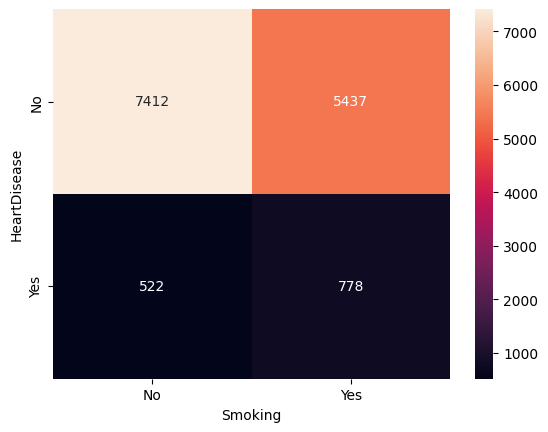

In [ ]:
sns.heatmap(pd.crosstab(dataset['HeartDisease'], dataset['Smoking']),annot=True, fmt='d')